## <a id='toc1_'></a>[Inaugural Project - Zbx336 & Cng782](#toc0_)



Import the needed packages.

In [347]:
from types import SimpleNamespace
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import statsmodels.api as sm
import pandas as pd
%load_ext autoreload
%autoreload 2

import HouseholdSpecializationModel
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model=HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <a id='toc1_'></a>[Question 1](#toc0_)

Task: Illustrate how HF/HM changes when varying α = {0.25, 0.5, 0.75}  and  σ = {0.5, 1.0, 1.5}


The code below is used for creating a table with the ratio of HF/HM for varying values of α & σ


In [348]:
# Table
from tabulate import tabulate

model = HouseholdSpecializationModelClass()

alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

results_df = pd.DataFrame(columns=['alpha', 'sigma'])

for alpha in alpha_vals:
    for sigma in sigma_vals:
        model.par.alpha = alpha 
        model.par.sigma = sigma 

        opt = model.solve_discrete()
        resultat = opt.HF / opt.HM

        results_df = results_df.append({'alpha': alpha, 'sigma': sigma, 'Ratio HF/HM': resultat}, ignore_index=True)

matrix = results_df.pivot(index='alpha', columns='sigma', values='Ratio HF/HM')

# Print the results
df=pd.DataFrame(matrix)
df.style

c:\Users\Admin\Desktop\Python kursus\IntroProg-lectures\projects\HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
C:\Users\Admin\AppData\Local\Temp\ipykernel_13172\4100942302.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'alpha': alpha, 'sigma': sigma, 'Ratio HF/HM': resultat}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13172\4100942302.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'alpha': alpha, 'sigma': sigma, 'Ratio HF/HM': resultat}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13172\4100942302.py:26: FutureWarning: The frame.append

sigma,0.500000,1.000000,1.500000
alpha,,,
0.250000,0.545455,0.307692,0.214286
0.500000,1.000000,1.000000,1.000000
0.750000,1.833333,3.250000,4.666667


The code below is used to create a figure of the results from the table above.

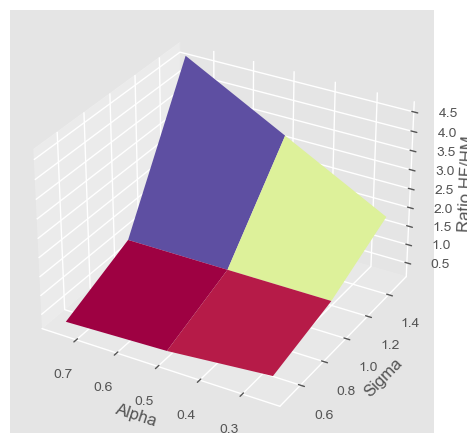

In [349]:
# Figure 

# import plot modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = results_df['alpha']
y = results_df['sigma']
z = results_df['Ratio HF/HM']

X, Y = np.meshgrid(np.unique(x), np.unique(y))
Z = z.values.reshape(len(np.unique(y)), len(np.unique(x)))

autumn_cmap = cm.get_cmap('Spectral')
ax.plot_surface(X, Y, Z, cmap=autumn_cmap)
ax.invert_xaxis()

ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('Ratio HF/HM')

# Show the plot
plt.show()

The figure shows the of HF/HM for varying values of alpha and sigma.

In this model, the alpha parameter determines the weight given to female labor in household production, while the sigma parameter determines the extent to which the household can substitute production for market consumption. The effects of these parameters on the HF/HM ratio depend on the specific form of the household production function, which can be different depending on the values of these parameters.

## <a id='toc1_'></a>[Question 2](#toc0_)

We use the code below to plot log(HF/HM) against log(wF/wM) for wF in the following interval [0.8, 0.9, 1.0, 1.1, 1.2]

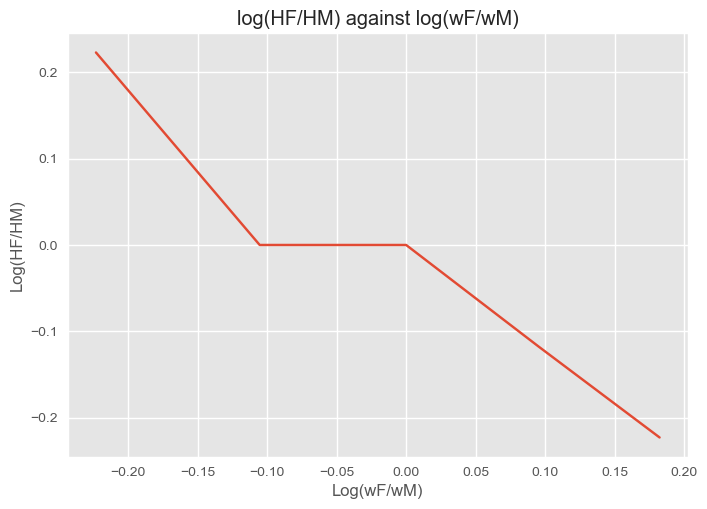

In [350]:
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
log_HF_HM_list = []
log_wF_wM_list = []

for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.sigma = 1
    model.par.alpha = 0.5 
    opt = model.solve_discrete()
    log_HF_HM_list.append(math.log(opt.HF_HM))
    log_wF_wM_list.append(math.log(wF / model.par.wM))

plt.plot(log_wF_wM_list, log_HF_HM_list)
plt.xlabel('Log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.title('log(HF/HM) against log(wF/wM)')
plt.show()


From the ratio plotted against each other, we see a negative correlation between the change in wages from working in the market and work in the home. The figure shows that men and women allocate the same hours at home, when their wage is equal. 
When men earns less than women, the man spend more time at home production than the women, and vice versa.

The household's decision-making process regarding the allocation of time between market work and home production activities is not directly influenced by the wage rate, as the latter is considered exogenous in the model. Instead, the wage rate affects the household's overall consumption and production choices indirectly, by influencing the household's income.

An increase in the wage rate leads to a rise in the household's income from market work, which in turn can boost the consumption of market goods and home-produced goods. Furthermore, a higher wage rate can affect the household's decision on how to allocate time between market work and home production activities, as it increases the opportunity cost of time spent on home production relative to market work.

Therefore, while the wage rate does not directly determine the household's time allocation to home production, it has indirect effects on the household's overall consumption and production choices by affecting the household's income and the opportunity cost of time.

## <a id='toc1_'></a>[Question 3](#toc0_)


In [1]:
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

log_HF_HM_list = []
log_wF_wM_list = []

model.sol.HM_vec = []
model.sol.HF_vec = []

for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.sigma = 1
    model.par.alpha = 0.5
    opt = model.solve()
    log_HF_HM_list.append(opt[2].log_HF_HM2)
    log_wF_wM_list.append(opt[2].log_wF_wM2)
    model.sol.HM_vec.append(opt[2].HM_best)
    model.sol.HF_vec.append(opt[2].HF_best)

plt.plot(log_wF_wM_list, log_HF_HM_list)
plt.xlabel('Log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.title('log(HF/HM) against log(wF/wM)')
plt.show()


NameError: name 'np' is not defined


The HF/HM ratio has a constant slope, which shows the same picture as the previous with a smaller slope this time. The HF/HM ratio decreases less than compared to the previous figure, which is due to function being continous in this model. Overall the picture is still the same, women work less in the home when they earn more, and spend less time at home production when their wage decreases. 


In [364]:
model.solve()
model.sol.HF_vec

[5.115716665422804,
 4.745635859698362,
 4.454475907685725,
 4.219942068861928,
 4.0271937155941675]

## <a id='toc1_'></a>[Question 4](#toc0_)

The code below solves for alpha and sigma to minimize (β0-β0\hat)^2+(β1-β1\hat)^2, and illustrates how well it fits the data from the research paper.

In [2]:

model.run_regression()
model.estimate()

NameError: name 'model' is not defined

In [3]:
log_HF_HM = np.log(np.array(model.sol.HF_vec) / np.array(model.sol.HM_vec))

log_wratio = np.log(model.par.wF_vec/model.par.wM)

beta0_hat = model.sol.beta0
beta1_hat = model.sol.beta1
print(f' beta0 = {model.sol.beta0:.3f}, beta1 = {model.sol.beta1:.3f}, deviation = {((model.par.beta0_target-model.sol.beta0)**2+(model.par.beta1_target- model.sol.beta1)**2):.3f}, alpha = {model.par.alpha:.3f}, sigma = {model.par.sigma:.3f}')


# Siminski and Yetsenga's regression line
syr=0.4+(-0.1)*log_wratio

# plot log(HF/HM) against log(wF/wM)

fig = plt.plot(log_wratio, log_HF_HM )
plt.plot(log_wratio, syr)
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.plot(log_wratio, syr, 's')
plt.legend(['Our regression', 'Siminski and Yetsenga'])
plt.style.use('seaborn')

plt.show()

NameError: name 'np' is not defined

From the figure, we get the following alpha and sigma values that minimze the errors:

alpha = 0.98 
sigma = 0.1 

- The figure shows that our regression with the values above fits almost perfectly with the data from  Siminiski and Yesenga's research paper.


## <a id='toc1_'></a>[*** The Following part only consists of tests ***](#toc0_)


In [356]:
#tester
#model.par.wF_vec = np.array([0.8,0.9,1.0,1.1,1.2])
#np.log((model.par.wF_vec)/(model.par.wM))
#np.log(np.array(model.sol.HF_vec) / np.array(model.sol.HM_vec))

In [357]:
#tester
#np.array(model.sol.HF_vec)

In [358]:
# tester
par = model.par
sol = model.sol

            # loops over each element of the wF_vec
for i, wF in enumerate(par.wF_vec):
    model.par.wF = wF
    opt= model.solve() # calls the solve() function and assigns the output to the opt variable
    model.sol.HF_vec[i] = opt[2].HF_best
    model.sol.HM_vec[i] = opt[2].HM_best
    model.sol.LF_vec[i] = opt[2].LF_best
    model.sol.LM_vec[i] = opt[2].LM_best
model.sol

namespace(LM_vec=array([6.14855296, 5.68569737, 5.22363884, 4.77347867, 4.3421147 ]),
          HM_vec=[3.6002861291021393,
                  3.5440737602004146,
                  3.5014523623147085,
                  3.4691216569307426,
                  3.444612965992002],
          LF_vec=array([2.30678737, 2.96363469, 3.50145332, 3.94050926, 4.29808466]),
          HF_vec=[5.492234303699799,
                  5.343201656743092,
                  5.223588787470122,
                  5.126280373480691,
                  5.045978552469613],
          beta0=0.4000097804134032,
          beta1=-0.09999302114266664)

In [359]:
# Question 5 (test)
model.estimate5()

c:\Users\Admin\Desktop\Python kursus\IntroProg-lectures\projects\HouseholdSpecializationModel.py:63: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Admin\Desktop\Python kursus\IntroProg-lectures\projects\HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Admin\Desktop\Python kursus\IntroProg-lectures\projects\HouseholdSpecializationModel.py:63: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Admin\Desktop\Python kursus\IntroProg-lectures\projects\HouseholdSpecializationModel.py:66: RuntimeWarning: invalid value encountered in double_scalars
  Q

(0.8688809967041029, 0.10038825988769548)